### MSDS 422 James Maxwell Week 1 Discussion - Part 2
#### Exploratory analysis of Titanic training data set

In [1]:
# import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read in the train.csv
df_train = pd.read_csv('train.csv')

In [3]:
# dataframe size
df_train.shape

(891, 12)

In [4]:
#inspect first 5 columns
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# list data types and indicate if there are missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# get basic stats on numerical data
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# ticket class break down
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

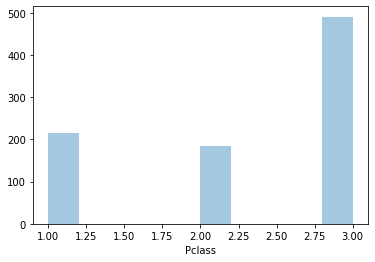

In [8]:
sns.distplot(df_train['Pclass'], kde=False);

In [9]:
# sex break down
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

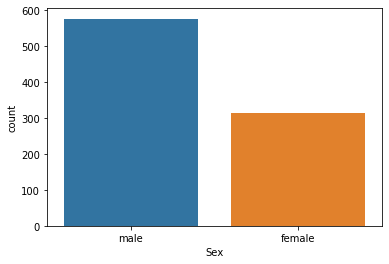

In [10]:
sns.countplot(df_train['Sex']);

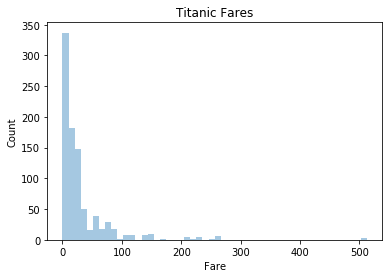

In [14]:
# Fare distribution
#sns.distplot(df_train['Fare'], kde=False)
#plt.title('Histogram of Fare');

ax = sns.distplot(df_train['Fare'], kde=False)
ax.set_title('Titanic Fares')
ax.set_ylabel('Count');

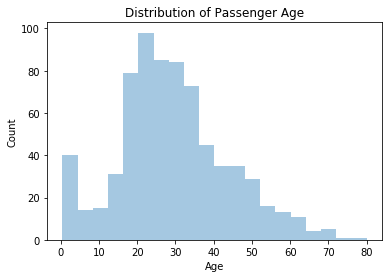

In [17]:
# Age distribution - need to drop the empty values before plotting
#sns.distplot(df_train['Age'].dropna(), kde=False);

ax = sns.distplot(df_train['Age'].dropna(), kde=False)
ax.set_title('Distribution of Passenger Age')
ax.set_ylabel('Count');

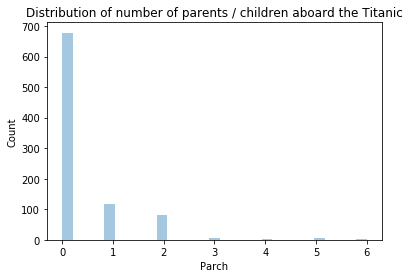

In [18]:
# number of parents / children aboard the Titanic
#sns.distplot(df_train['Parch'], kde=False);

ax = sns.distplot(df_train['Parch'].dropna(), kde=False)
ax.set_title('Distribution of number of parents / children aboard the Titanic')
ax.set_ylabel('Count');

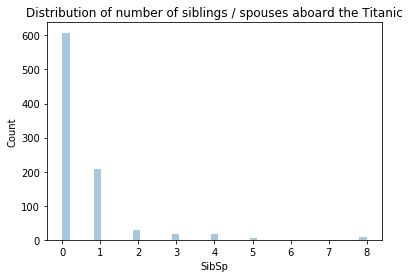

In [19]:
# number of number of siblings / spouses aboard the Titanic
#sns.distplot(df_train['SibSp'], kde=False);

ax = sns.distplot(df_train['SibSp'].dropna(), kde=False)
ax.set_title('Distribution of number of siblings / spouses aboard the Titanic')
ax.set_ylabel('Count');

In [34]:
df_train.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

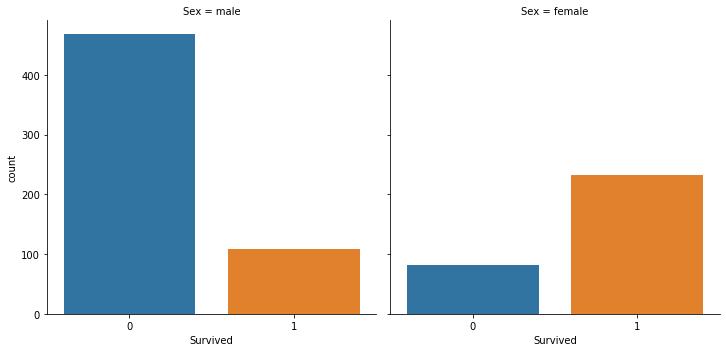

In [29]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train);

In [35]:
df_train.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

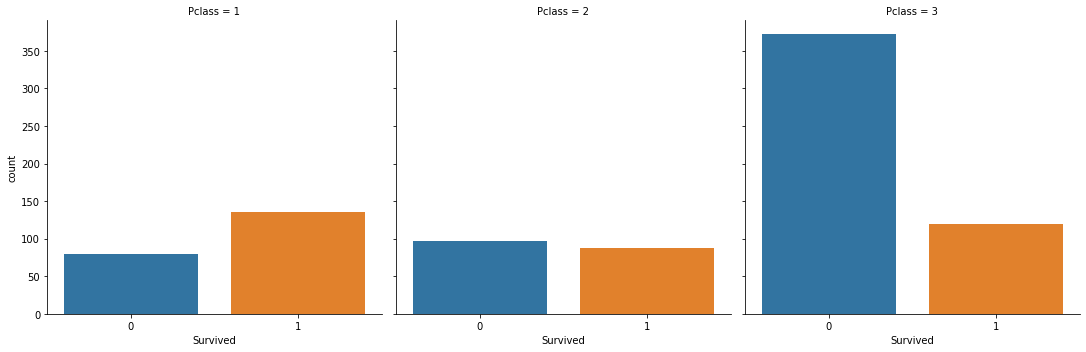

In [30]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_train);